In [72]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv("housing.csv")

df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,NaN,3.8462,342200.0,NEAR BAY


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20429 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20636 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20638 non-null  float64
 9   ocean_proximity     20637 non-null  object 
dtypes: float64(6), int64(3), object(1)
memory usage: 1.6+ MB


In [74]:
# Get the number of missing values in each column

print(df.isnull().sum())


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        211
population              0
households              4
median_income           0
median_house_value      2
ocean_proximity         3
dtype: int64


In [75]:
# Get the number of missing values in each column
print(df.isnull().sum(axis=0))


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        211
population              0
households              4
median_income           0
median_house_value      2
ocean_proximity         3
dtype: int64


In [76]:
# Get the number of missing values in each row
print(df.isnull().sum(axis=1))

0        0
1        0
2        0
3        0
4        1
        ..
20635    0
20636    0
20637    0
20638    0
20639    0
Length: 20640, dtype: int64


# handle missing value

In [77]:
# check for missing values
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        211
population              0
households              4
median_income           0
median_house_value      2
ocean_proximity         3
dtype: int64

In [78]:
df['ocean_proximity'] = df['ocean_proximity'].fillna(df['ocean_proximity'].mode()[0])

In [79]:
print(df.isnull().sum())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        211
population              0
households              4
median_income           0
median_house_value      2
ocean_proximity         0
dtype: int64


In [80]:
# Separate numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns

for col in numerical_columns:
    df[col].fillna(df[col].mean(), inplace=True)

In [81]:
print(df.isnull().sum())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


In [82]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126.000000,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138.000000,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177.000000,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219.000000,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,499.575111,3.8462,342200.0,NEAR BAY


In [83]:
ocean_proximity_value_counts = df["ocean_proximity"].value_counts()

# Display the counts of unique values
print(ocean_proximity_value_counts)

<1H OCEAN     9139
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2287
ISLAND           5
Name: ocean_proximity, dtype: int64


## label encoder

In [84]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to categorical columns
df["ocean_proximity"] = label_encoder.fit_transform(df["ocean_proximity"])

In [85]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126.000000,8.3252,452600.0,3
1,-122.22,37.86,21,7099,1106.0,2401,1138.000000,8.3014,358500.0,3
2,-122.24,37.85,52,1467,190.0,496,177.000000,7.2574,352100.0,3
3,-122.25,37.85,52,1274,235.0,558,219.000000,5.6431,341300.0,3
4,-122.25,37.85,52,1627,280.0,565,499.575111,3.8462,342200.0,3


In [86]:
ocean_proximity_after = df["ocean_proximity"].value_counts()

# Display the counts of unique values
print(ocean_proximity_after)

0    9139
1    6551
4    2658
3    2287
2       5
Name: ocean_proximity, dtype: int64


# normalizaation

In [87]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.899848,1425.476744,499.575111,3.870671,206852.449898,1.165407
std,2.003532,2.135952,12.585558,2181.615252,419.259971,1132.462122,382.320487,1.899822,115395.108949,1.420560
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,410.000000,3.534800,179700.000000,1.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000,1.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,4.000000


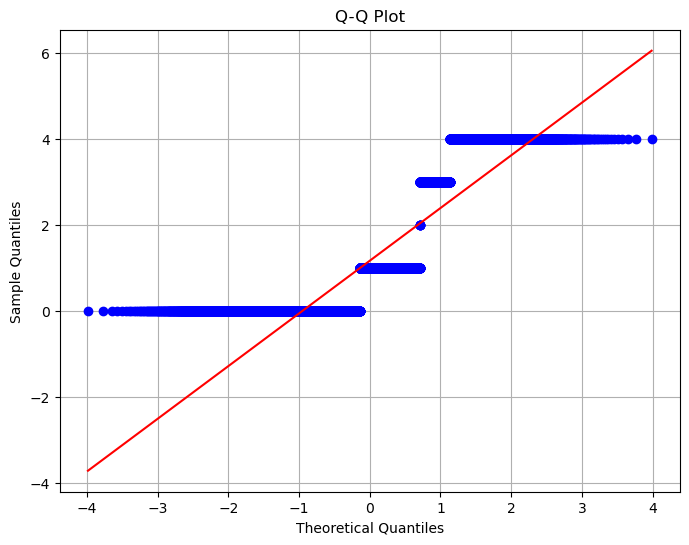

In [88]:
import matplotlib.pyplot as plt
import scipy.stats as stats
plt.figure(figsize=(8, 6))
stats.probplot(df[column], dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid(True)
plt.show()

In [89]:
from sklearn.preprocessing import MinMaxScaler

# drop the target variable
y = df['median_house_value']
df.drop(columns=['median_house_value'], axis=1, inplace=True)

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
data_normalized = scaler.fit_transform(df)

# Convert the normalized data array back to a DataFrame
data_normalized = pd.DataFrame(data_normalized)

# Print the first few rows of the normalized data
data_normalized.head()


,0,1,2,3,4,5,6,7,8
0,0.211155,0.567481,0.784314,0.022331,0.019863,0.008941,0.020556,0.539668,0.75
1,0.212151,0.565356,0.392157,0.180503,0.171477,0.067210,0.186976,0.538027,0.75
2,0.210159,0.564293,1.000000,0.037260,0.029330,0.013818,0.028943,0.466028,0.75
3,0.209163,0.564293,1.000000,0.032352,0.036313,0.015555,0.035849,0.354699,0.75
4,0.209163,0.564293,1.000000,0.041330,0.043296,0.015752,0.081989,0.230776,0.75


In [90]:
data_normalized.describe()

,0,1,2,3,4,5,6,7,8
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,0.476125,0.328572,0.541951,0.066986,0.083318,0.039869,0.081989,0.232464,0.291352
std,0.199555,0.226988,0.246776,0.055486,0.065062,0.031740,0.062871,0.131020,0.355140
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.253984,0.147715,0.333333,0.036771,0.045934,0.021974,0.045881,0.142308,0.000000
50%,0.583665,0.182784,0.549020,0.054046,0.067815,0.032596,0.067259,0.209301,0.250000
75%,0.631474,0.549416,0.705882,0.080014,0.099666,0.048264,0.099326,0.292641,0.250000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [91]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data_normalized, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
linear_regressor = LinearRegression()

# Fit the model to the training data
linear_regressor.fit(X_train, y_train)

# Predict using the model
y_train_pred = linear_regressor.predict(X_train)
y_test_pred = linear_regressor.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Training MSE: {train_mse}")
print(f"Test MSE: {test_mse}")
print(f"Training R2 score: {train_r2}")
print(f"Test R2 score: {test_r2}")



Training MSE: 4811502904.544861
Test MSE: 5054165371.674547
Training R2 score: 0.640063364890418
Test R2 score: 0.6143062619687415
